<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/Classification_02_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Tutorial #02

# Supervised Learning

by [David Luke Elliott](https://www.lancaster.ac.uk/psychology/about-us/people/david-elliott)
/ [GitHub](https://github.com/Eldave93) 

In the previous notebook we looked at methods to prepare the feature data with sklearn and imblearn before it is put into a classifier. This notebook will now focus on 'supervised' classifiers, which can be run on the data to detect signal differences and separate signals into different groups. Classifiers separate pre-determined classes under the assumption that the presented data belongs to one of the classes. A classifier can simply be imposing a threshold on features, or employing more complex methods such as using machine learning algorithms, which require training and application to unseen data<sup>1</sup>.

If a machine learning algorithm is chosen to classify data then selecting features is only the first step and is often followed by choosing a performance metric to optimize, choosing one or more classifier and optimization algorithms, evaluating model performance, and then tuning the algorithm<sup>2</sup>.

Machine learning algorithms can be categorised by the level of ‘supervision’ for the learning. Supervised learning is where data is learned to be mapped onto labels using training examples and therefore can also be known as a classification task. ‘Supervised’ refers to where the desired output labels are already known<sup>2</sup>. Classification, a subclass of supervised learning, aims to predict the class of labels of new data instances based on previous observations. Binary classification is where an algorithm learns rules to distinguish between two cases, with most machine learning algorithms able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>2</sup>. As well as categorical labels, continuous outcomes can be predicted using algorithms such as regression analysis. 

There are two broad types of classification algorithm; generative and discriminative algorithms. Generative algorithms, such as Naive Bayes’ models, hidden Markov models, and Gaussian mixture models, learn the joint probability of data instances and their labels and subsequently apply Bayes’ theorem to calculate the posterior probability and predict new data instances<sup>3,4</sup>; Bayes’ theorem being a method of model selection by calculating the likelihood of a model given the data and expected distribution of the probabilities (prior). Discriminative algorithms, such as logistic regression, support vector machines, and decision trees, model the boundaries separating labels<sup>5</sup>. Generally discriminative algorithms outperform generative algorithms<sup>6</sup>, but generative algorithms can identify new labels. 

---
1. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.
2. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
3. Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal sensing: understanding mental health using ubiquitous sensors and machine learning. Annual review of clinical psychology, 13, 23-47.
4. Ng, A. Y., & Jordan, M. I. (2002). On discriminative vs. generative classifiers: A comparison of logistic regression and naive bayes. In Advances in neural information processing systems (pp. 841-848).
5. Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal sensing: understanding mental health using ubiquitous sensors and machine learning. Annual review of clinical psychology, 13, 23-47.
6. Bernardo, J. M., Bayarri, M. J., Berger, J. O., Dawid, A. P., Heckerman, D., Smith, A. F. M., & West, M. (2007). Generative or discriminative? getting the best of both worlds. Bayesian statistics, 8(3), 3-24.

# Load Data

First lets start by getting our workspace ready and then loading in the data.

**Notes**
- See the Feature Extraction Tutorial (Epileptologie) or Feature Pre-Processing tutorials if your unsure how to get the data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


You may need to change below to where you have saved the dataset

In [0]:
FILE_PATH = '/content/gdrive/My Drive/Data/feature_df.json.gzip'

In [3]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 38 columns):
D1_LSWT        500 non-null float64
D1_Ratio       500 non-null float64
D1_mean        500 non-null float64
D1_mean_abs    500 non-null float64
D1_std         500 non-null float64
D2_LSWT        500 non-null float64
D2_Ratio       500 non-null float64
D2_mean        500 non-null float64
D2_mean_abs    500 non-null float64
D2_std         500 non-null float64
D3_LSWT        500 non-null float64
D3_Ratio       500 non-null float64
D3_mean        500 non-null float64
D3_mean_abs    500 non-null float64
D3_std         500 non-null float64
D4_LSWT        500 non-null float64
D4_Ratio       500 non-null float64
D4_mean        500 non-null float64
D4_mean_abs    500 non-null float64
D4_std         500 non-null float64
D5_LSWT        500 non-null float64
D5_Ratio       500 non-null float64
D5_mean        500 non-null float64
D5_mean_abs    500 non-null float64
D5_std         500 non-null flo

None

,D1_LSWT,D1_Ratio,D1_mean,D1_mean_abs,D1_std,D2_LSWT,D2_Ratio,D2_mean,D2_mean_abs,D2_std,...,D6_mean_abs,D6_std,class,file_id,location,power_alpha,power_beta,power_delta,power_gamma,power_theta
0,3.665018,0.362810,-0.041443,1.910710,2.479649,4.749819,0.631333,-0.008293,5.266416,6.528848,...,76.722313,95.640549,baseline,F001,intracranial epileptogenic zone,13.102026,4.033713,125.389091,1.101212,38.175072
1,8.020356,0.208105,-0.002805,1.761159,3.013578,8.062119,0.514802,0.120496,8.462824,18.706007,...,281.597393,402.092208,baseline,F002,intracranial epileptogenic zone,201.886582,52.737781,3797.194021,14.147616,492.166476
2,7.170449,0.210005,-0.034373,2.179047,4.973884,7.197397,0.499067,-0.034026,10.376156,15.889841,...,298.635855,360.445632,baseline,F003,intracranial epileptogenic zone,135.970946,39.098686,787.823018,8.769312,208.119170
3,6.950912,0.365782,-0.032627,1.812019,2.324897,7.086014,0.516294,0.081712,4.953816,6.422304,...,127.731141,167.126107,baseline,F004,intracranial epileptogenic zone,34.191639,7.443866,240.974656,1.923739,105.055098
4,8.480473,0.198041,0.081691,3.478807,6.027705,8.460379,0.625299,0.069729,17.566081,28.556063,...,270.422836,349.299940,baseline,F005,intracranial epileptogenic zone,218.880920,68.804894,1154.608671,18.070537,462.277208


# Channel Selection

As can be seen, there are 3 types of electrode placement locations in this data

In [4]:
feature_df['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus',
       'surface'], dtype=object)

For now lets just select data that has been collected intracranially

In [5]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus'],
      dtype=object)

# Data Preparation

The below broadly copies some of the data preparation from the previous notebook.

You normally do not look at how a model did on the test set until the very end once you have selected a final model. If you keep checking the test set you could be developing a model that overfits to the test set and therefore will not give you a true understanding of the generalisation error. We will get into better ways of doing model evaluation in the next notebook, but for now lets split the training set up into training, validation, and test sets to reinforce this.

**Note**
- It is also better to split the data up BEFORE using feature extraction techniques. Make sure to do this for full machine learning pipelines.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], 
                                            axis='columns')
data_x = feature_reduced_drop.values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])
    
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(192, 35) (48, 35) (60, 35)
(192,) (48,) (60,)


We've already come across the scaler in the previous tutorial, but it is needed for classifiers with decision thresholds as we will explore in this tutorial

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Logistic Regression

Logistic regression is a linear model for classification of a dependent variable which has a limited number of possible values. Logistic regression is a probabilistic model, using an odds ratio to determine the probability of the categorisation of an event<sup>1</sup>. In binary classification, if the estimated probability is greater than 50% then the instance is predicted to be the positive class (e.g. ictal), otherwise the negative class is predicted (e.g. inter-ictal)<sup>2</sup>.

Lets first see how we would fit a Logistic Regression model to our data

**Notes**
- This is not to be confused with linear regression where the dependent variable is continuous. 

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [8]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100., 
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

As has been previously mentioned, logistic regression is a discriminative algorithm, therefore it models the boundaries separating labels. To demonstrate this separation lets look at the desision regions from two features, D1_Ratio and D2_Ratio. First lets plot it out without a separation boundary.

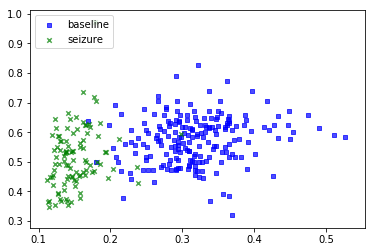

In [9]:
from mlxtend.plotting import category_scatter

x_axis_label = 'D1_Ratio'
y_axis_label = 'D2_Ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class', 
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_std[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

As can be seen from the resulting plot, this particular combination of features (with one or two exceptions) quite nicely allows for the linear separation of baseline (0) and seizure (1) data

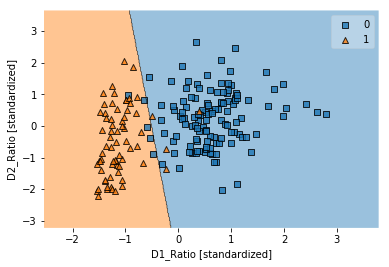

In [10]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]') 
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

You may have noticed we specified the parameter C when creating the Logistic Regression classifier. This can be used to address the problem of overfitting to the training data as increasing the value of C decreases the strength of the regularization on the model. Lets have a quick look what changes to C looks like in our linear decision boundary.

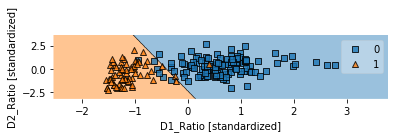

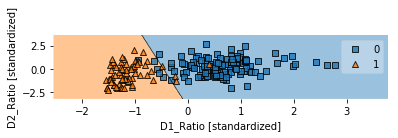

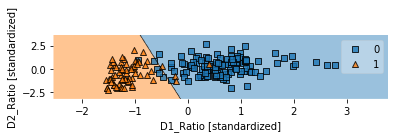

In [11]:
for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plt.subplot(310+i+1)
    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg)

    plt.xlabel(x_axis_label + ' [standardized]') 
    plt.ylabel(y_axis_label + ' [standardized]')
    plt.show()

So far we have been completing each step individually, but we can use pipelines to tie steps together. This is especially useful as pipeline steps become more complex.

Lets first make a model where we scale our data and then put it into our logistic regression classifier

In [12]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100, 
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

Notice this time we set class_weight = 'balanced'. In the last tutorial we discussed class ballancing using the imblearn package, but you can also do it at the classification step in sklearn. 

Machine learning algorithms typically optimize a reward or cost function using the sum of the training examples when fitted. Therefore the descision boundary is going to be bias towards the majority class as the opimizations are based on the predictions which is inevitability affected if it has to predict one class more than another. The easiest way to do this in sklearn is just to assign a larger penalty to wrong predictions on the minority class using the class_weight parameter<sup>1</sup>.

As we can see below there is a class ballance in the data to warrent this parameters use.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [13]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 124]
 [  1  68]]


Now we will retrain the model on the full data again and see how accurately it predicts the validation set which it hasn't been trained on.

Accuracy is a simple evaluative measure as it just gives the number of correct or false predictions comparative to the total number of prediction. We will just use this for now as we will go over other model assessments in the next tutorial.

**NOTE**
- *Score()* applys the transforms to the data, and scores with the final estimator

In [14]:
pipe_reg.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Test Accuracy: 0.958


Pretty good but we've missclassified a few. Let look at the examples that were missclassifed. First lets get an array of the predicted classes.

**NOTE**
- *Predict()* applys the transforms to the data, and predicts with the final estimator in a pipeline

In [15]:
predicted = pipe_reg.predict(X_val)
predicted

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0])

As you can see its similar to the validation data

In [16]:
y_val

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0])

But to plot the data that are misclassified, we'll need to know the file_id's of those files that were wrongly labeled. We did not split the data as a dataframe with these file_id's in so we'll just redo the train_test_split but just with the file_id's instead of our feature data.

We'll just check our new splits are the same; they should be because we used the same random state and test_size so the splits should be in the same place.

In [17]:
X_train_id, X_test_id, y_train_id, y_test_id = train_test_split(feature_reduced['file_id'], 
                                                                data_y, 
                                                                test_size=TEST_SIZE, 
                                                                random_state=RANDOM_STATE)

X_train_id, X_val_id, y_train_id, y_val_id = train_test_split(X_train_id,
                                                              y_train_id, 
                                                              test_size=TEST_SIZE, 
                                                              random_state=RANDOM_STATE)

print('The validation classes are the same: ' + str(np.array_equal(y_val, y_val_id)))

print(color.BOLD+color.UNDERLINE+"\nValidation ID's"+color.END)
X_val_id.head()

The validation classes are the same: True

Validation ID's


392    S093
166    N067
54     F055
137    N038
50     F051
Name: file_id, dtype: object

Before we plot out missclassified samples lets have a look at what seizures and interictal activity look like normally. If you havent already got it, we will need to download the raw data for this.

**NOTES**
- If you want to understand this a bit better then have a look at the Epileptologie feature extraction notebook but don't worry about this too much

In [18]:
!pip install beautifulsoup4 requests wget

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [19]:
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile
import glob
import pprint
import re

DOWNLOAD_DIR = "Epileptologie Database"


def find_files(url):
    # get a soup of the directory url
    soup = BeautifulSoup(requests.get(url).text, features="html.parser")

    # make a list of all the links in the url
    hrefs_list = []
    for link in soup.find_all('a'):
        hrefs_list.append(link.get('href'))

    return hrefs_list
    
    
def download_file(download_file_url, file_dir, output=False):
    if output:
        # print it is downloading
        print('Downloading: '+ download_file_url)
    # download the file to the directory
    wget.download(download_file_url, file_dir)
    
    
# needs a directory to download it to
def download_epileptologie(DIR, output=False):
    
    # directory url
    front_url = 'http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3'
    dir_url = 'http://epileptologie-bonn.de/cms'

    hrefs_dir_list = find_files(front_url)
    
    # for each link in the directory
    for link in hrefs_dir_list:
        # download the files outside of participant folders we want
        if re.findall('zip', str(link)):
            # if the file doesnt already exist in the directory
            if not os.path.exists(os.path.join(DIR, link)):
                download_file(dir_url+'/'+str(link), DIR, output)
                zip_file_name = link.split('/')[-1]
                zip_ref = zipfile.ZipFile(os.path.join(DIR, zip_file_name), 'r')
                zip_ref.extractall(os.path.join(DIR, zip_file_name[0]))
                zip_ref.close()
                os.remove(os.path.join(DIR, zip_file_name))
                
                
def file_list(folder_path, output=False):
  pp = pprint.PrettyPrinter()
  # create an empty list
  file_list = []
  # for file name in the folder path...
  for filename in glob.glob(folder_path):
      # ... append it to the list
      file_list.append(filename)

  # sort alphabetically
  file_list.sort()

  # Output
  if output:
      print(str(len(file_list)) + " files found")
      pp.pprint(file_list)

  return file_list
                

if not os.path.exists(DOWNLOAD_DIR):
  os.makedirs(DOWNLOAD_DIR)
  
download_epileptologie(DOWNLOAD_DIR, output=False)

# get folder lists
dir_file_list = file_list(os.path.join(DOWNLOAD_DIR, '*'), output=True)

5 files found
['Epileptologie Database/F',
 'Epileptologie Database/N',
 'Epileptologie Database/O',
 'Epileptologie Database/S',
 'Epileptologie Database/Z']


I'll randomly sample 9 files from the intracranial data and then plot them. 

**Notes**
- I've left it so the random generator picks different ones each time so you can keep running this to see more if you wish.

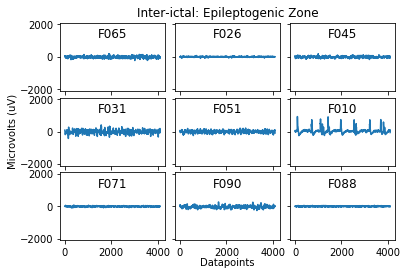

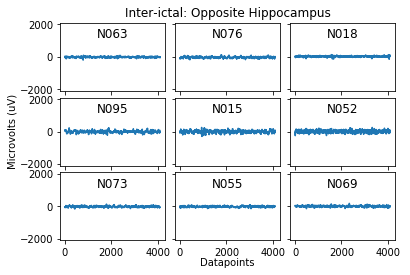

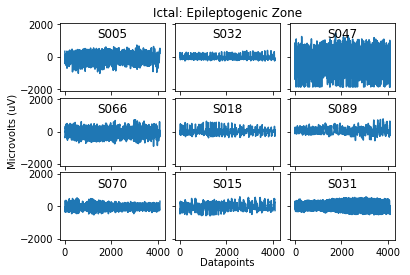

In [20]:
import random

for directory in dir_file_list:
  if re.findall('N|F|S',directory[-1]):
      # make a list of all the files in the directory
      files = file_list(os.path.join(directory, '*'))
      # randomly select 9 files from the list
      sampled_files = random.sample(files, 9)


      fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
      x=0
      y=0
      for file in sampled_files:

          # read in the datafile
          data = pd.read_csv(file,                      # file in
                             header=None,               # no column names at top of file
                             dtype=float)               # read data as 'floating points' (e.g. 1.0)

          axs[x, y].plot(data)
          axs[x, y].set_title(re.findall('\w\d+', file)[0], pad =-15)
          # plot all of them on the same scale
          axs[x, y].set_ylim([-2100, 2100])

          x+=1

          if x == 3:
              y +=1
              x=0


      # add a big axes, hide frame
      fig.add_subplot(111, frameon=False)
      # hide tick and tick label of the big axes
      plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
      plt.grid(False)
      plt.xlabel("Datapoints", labelpad =0.5)
      plt.ylabel("Microvolts (uV)", labelpad =20)
      plt.subplots_adjust(wspace=0.1, hspace=0.1)    

      if directory[-1] == 'N':
          plt.title('Inter-ictal: Opposite Hippocampus')

      if directory[-1] == 'F':
          plt.title('Inter-ictal: Epileptogenic Zone')

      if directory[-1] == 'S':
          plt.title('Ictal: Epileptogenic Zone')

      plt.show()

Now we will plot out the missclassified samples. 

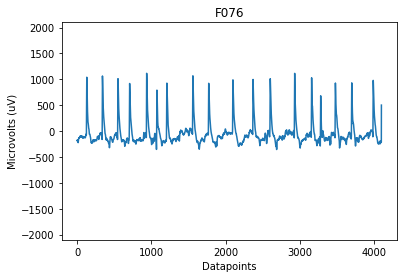

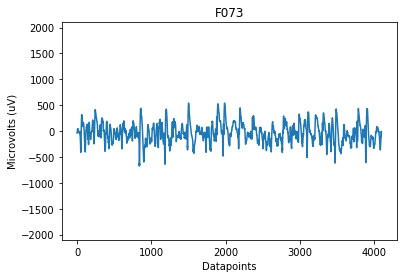

In [22]:
import pathlib

# reset the index so it goes from 0 to n-1
X_val_id = X_val_id.reset_index(drop=True)

def plot_missclassified(predicted, data_y, data_x):

  for index, class_no in enumerate(predicted):
      if class_no != data_y[index]:
          # filepath
          try:
            file_path = os.path.join(DOWNLOAD_DIR,
                                     data_x[index][0], # get letter for folder 
                                     data_x[index]+'.txt')
            # read in the datafile
            data = pd.read_csv(file_path,     # file in
                               header=None,   # no column names at top of file
                               dtype=float)   # read data as 'floating points' (e.g. 1.0)
          
          # sometimes the file extension is .TXT
          except FileNotFoundError:
            file_path = os.path.join(DOWNLOAD_DIR,
                                     data_x[index][0],
                                     data_x[index]+'.TXT')

            # read in the datafile
            data = pd.read_csv(file_path,
                               header=None,
                               dtype=float)

          plt.plot(data)
          plt.title(data_x[index])
          # plot all of them on the same scale
          plt.ylim(bottom = -2100, top=2100)
          plt.xlabel('Datapoints')
          plt.ylabel('Microvolts (uV)')
          plt.show()
            
plot_missclassified(predicted, y_val, X_val_id)

# Support Vector Machine (SVM)

Support Vector Machines (SVM) are another common discriminative algorithm, well suited to complex small- to medium sized datasets<sup>1</sup>, which aim to find a hyperplane that provides the maximum margin of separation between classes of objects. A subset of training data, known as support vectors, are selected by an algorithm to compute the optimal separation hyperplane between classes. If data can be linearly separated, then a 'hard margin' of separation can be used; whereby a point on the edge of a class is used as the support vector for the decision boundary. However this method is sensitive to outliers, so a more flexible method may be preferable, using a soft margin of separation to compute a hyperplane that still provides a maximum margin of separation, whilst still allowing for some errors. In Scikit-Learn's SVM class this can be controlled by the C hyperparameter; with a smaller C creating a wider boundary but with more margin violations. A hyperplane does not need to be linear as the input feature space can be projected to higher dimensions using a radial basis kernel<sup>2,3</sup>, allowing a hyperplane to be fitted to split the data into classes. The data can then be mapped back into the original feature space to create a nonlinear separation boundary.

There are three classes for SVM classification in Scikit-Learn (table below adapted from Géron(2017)<sup>1</sup>):

| Class                | Time Complexity                                                                      | Out-of-core Support | Kernel Trick|
|------------------------|-------------------------------------------------------------------------------------------|---------------------------------|--------------------|
| LinearSVC       | 0(*m* x *n*)                                                                               | No                               | No                |
| SGDClassifier | 0(*m* x *n*)                                                                               | Yes                              | No                |
| SVC                  | 0(*m*<sup>2</sup> x *n*) to 0(*m*<sup>3</sup> x *n*) | No                               | Yes               |

First lets make a pipeline with two steps:

1. Standardize the features
2. SVM

For the SVM we'll just use the SVC and set the kernel to linear so we can compare the decision boundary to the logistic regression as we did before. The data is quite small so using SVC, although takes longer than the other two methods, is fine for this dataset.

---

1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Cover, T. M. (1965). Geometrical and statistical properties of systems of linear inequalities with applications in pattern recognition. IEEE transactions on electronic computers, (3), 326-334.
3. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.

In [23]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced', 
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False))])

If we plot out the decision regions we'll see its quite similar to the logisitic regression. 

First we'll change the visualisation data to work on the non-scaled data as we now scale in our pipeline.

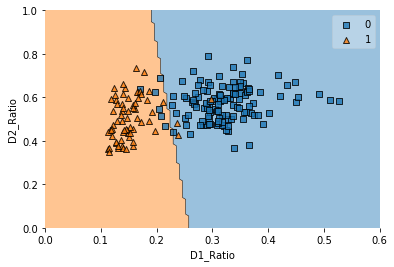

In [24]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

However if we change the kernel to a radial basis function this creates a non-linear decision boundary.

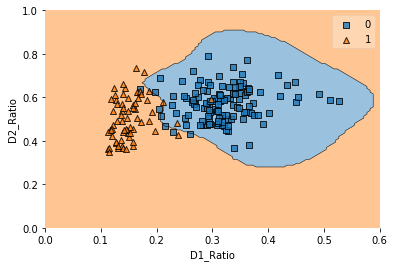

In [26]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced', 
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

As we can see the new non-linear boundary has actually not changed the accuracy from our previous model. If we were to change the hyperparameters this may be different.

In [27]:
pipe_svc_rbf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Test Accuracy: 0.958


Lets use the same method as before to identify misclassified samples... which are exactly the same...

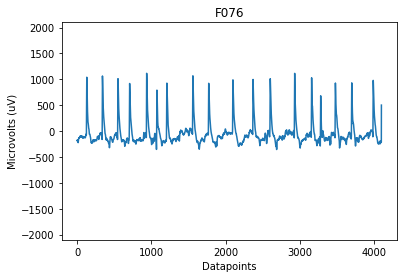

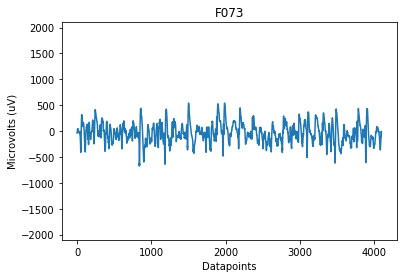

In [28]:
predicted = pipe_svc_rbf.predict(X_val)

plot_missclassified(predicted, y_val, X_val_id)

# Decision Tree

A decision tree breaks data down by asking a series of questions in order to categorise samples into the same class. An algorithm starts at a tree root and then splits the data based on the features that gives the largest information gain. This splitting procedure occours until all the samples within a given node all belong to the same class. A limit on nodes, or tree depth, is often set to avoid overfitting due to a deep tree. To split using information gain relies on calculating the difference between an impurity measure of a parent node and the sum of the impurities of its child nodes; information gain being high when impurity of the child nodes is low. Three impurity measures that are commonly used in binary decision trees are gini impurity, entropy, and the classification error. An ensemble of decision trees can be created to build a more robust model by giving each tree a random bootstrap sample of the data and using a majority voting rule to predict class label<sup>1</sup>. 

Lets start by building a tree with one split.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Lets have a look at our dataset with two feature and one split.

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to produce binary trees, meaning nodes always have two children. Other algorithms, such as ID3, can have more children. The algorithms spits the training set into two subsets using a single feature and a theshold searching for the pair that produces the 'purest' subset based on size, minimising a cost function. Once split, it uses the same logic recursively until the maximum depth is reached or a split cannot be found that reduces impurity<sup>1</sup>. 

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [30]:
!pip install graphviz

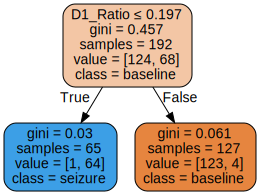

In [31]:
from sklearn.tree import export_graphviz
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=[x_axis_label, y_axis_label],  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

graphviz.Source(dot_data)

As we can see above it has chosen a value at which to split the data up. If below or equal to 0.197 it is classed as seizure and above is baseline.

If we then look at the descision boundary we see this is just a straight line representing this split

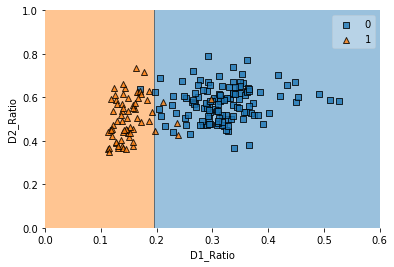

In [32]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

Lets now not restrict the number of splits it uses.

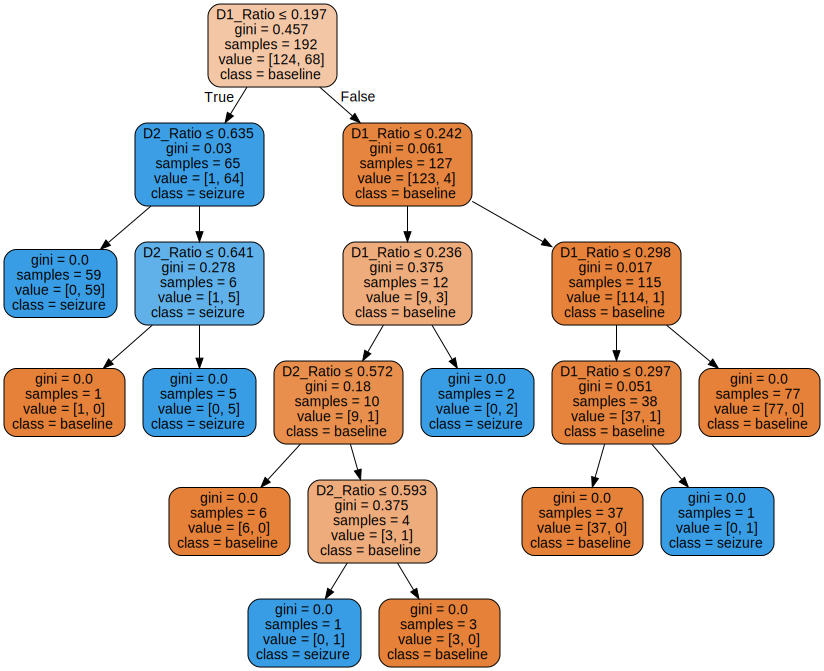

In [34]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=[x_axis_label, y_axis_label],  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

graphviz.Source(dot_data)

As can be seen by the descision boundary, a decision tree is quite boxy. Also in this case it appears to be overfitting to the training data (see the thin orange line in the blue).

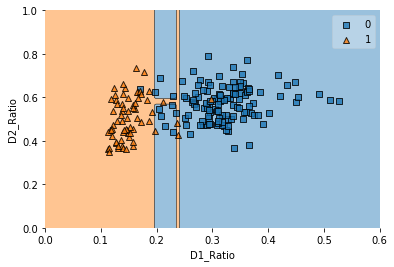

In [35]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

Lets now fit it on the full training data and see what features it uses to split the data. Decision trees are useful as they allow us assess the importance of each feature to classify the data, which can be used as a dimensionality reduction method. This will be further looked at in a later tutorial.

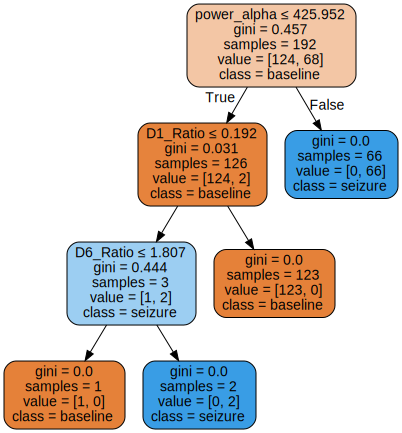

In [36]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None, 
                     feature_names=feature_reduced_drop.columns,  
                     class_names=feature_reduced['class'].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  

graphviz.Source(dot_data)

When we test the accuracy it becomes slightly worse than the support vector machine, but as we saw this could be due to overfitting to the training data. We will use methods in later tutorials to test for this!

In [37]:
print('Test Accuracy: %.3f' % DT.score(X_val, y_val))

Test Accuracy: 0.917


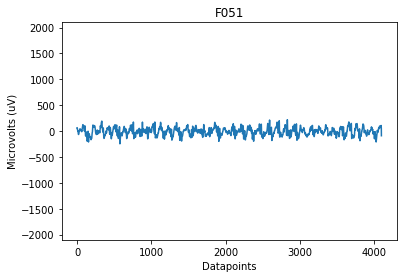

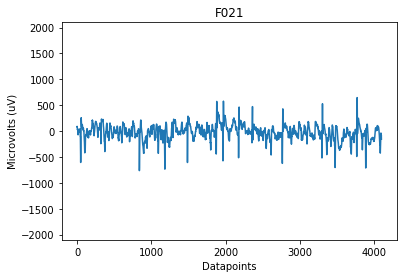

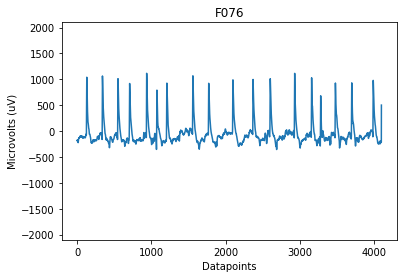

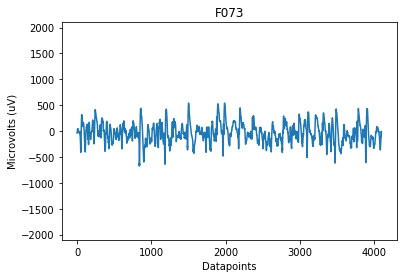

In [38]:
predicted = DT.predict(X_val)

plot_missclassified(predicted, y_val, X_val_id)

# K-Nearest Neighbors

KNN finds a number of samples that are the most similar to a data point we want to classify, based on a given distance metric, with its assigned class label depending on a majority vote by the nearest neighbours<sup>1</sup>. KNN is classed as a lazy learner as is memorizes the training data rather than learning a discriminative function<sup>1</sup>. The number of *k* and a distance metric need to be specified (often the Euclidean distance with real valued data; the default in sklearn), with the algorithm using these to classify a sample and assigning it a label by majority vote using the *k* samples in the training set that are the most similar to the point we want to sample<sup>1</sup>.

The classifier can be easily adapted as new data becomes available, however classification complexity linearly increases with the number of data in the training set; unless data structures such as KD-Trees are used<sup>1,2</sup>. Furthermore, KNN is susceptible to overfitting due to the curse of dimensionality, where the feature space becomes more sparse as the number of dimensions of the feature space increases<sup>1</sup>. This is where dimensionality reduction techniques can help (see later tutorial).

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Friedman, J. H., Bentley, J. L., & Finkel, R. A. (1976). An algorithm for finding best matches in logarithmic time. ACM Trans. Math. Software, 3(SLAC-PUB-1549-REV. 2), 209-226.

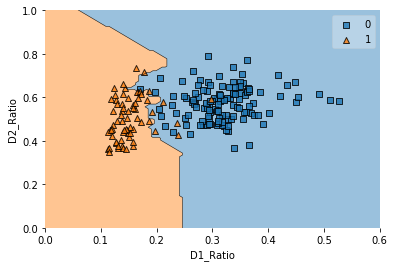

In [39]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_knn)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

This method is a bit better than the previous one. Although it is overfitting, it is likely doing this less than the decision tree was.

In [40]:
pipe_knn.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_knn.score(X_val, y_val))

Test Accuracy: 0.938


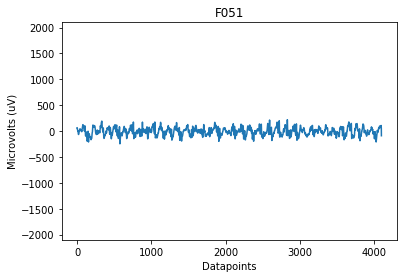

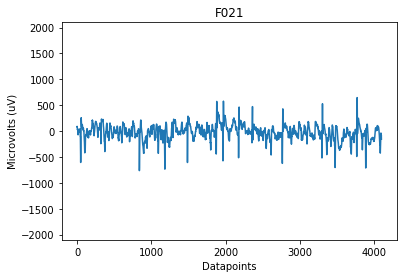

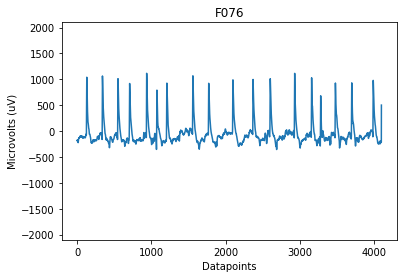

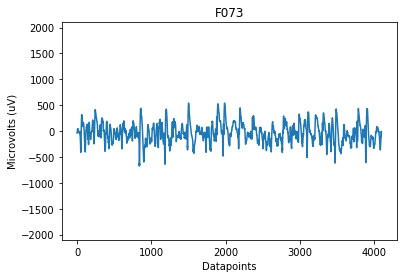

In [41]:
plot_missclassified(predicted, y_val, X_val_id)

# Multiclass Classification

Random Forest classifiers are inherently multiclass whereas other machine learning algorithms are able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>1</sup>.

Before we finish this tutorial lets see how well we can classify the different electrode locations (intracranial epileptogenic zone, surface, intracranial hippocampus).

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

In [0]:
data_x = feature_df.drop(['class','file_id', 'location'], 
                         axis='columns').values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(feature_df['location'])
    
X_train, X_test, y_train, y_test = train_test_split(data_x, 
                                                    data_y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE)

The decision tree assigns probabilities to the class membership for each of the classes, as demonstrated below using the first 5 data examples 

In [43]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

DT.predict_proba(X_val[:5,:])

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Now lets have a look at how we can use the OneVsRestClassifier to extend a binary support vector machine to be used for multi-class classification.

One-vs-the-rest (or one-verses-all) is were you train a classifier for each class and select the class from the classifier that outputs the highest score<sup>1</sup>. As each class is fitted against all other classes for each classifier, it is relatively interpretable<sup>2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [0]:
from sklearn.multiclass import OneVsRestClassifier

pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(SVC(C=100,
                                    kernel='rbf',
                                    gamma = 'auto',
                                    class_weight = 'balanced',
                                    random_state=RANDOM_STATE)))])

pipe_svc_rbf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Test Accuracy: 0.825


Another strategy is to use a OneVsOneClassifer. This trains $N \times (N-1) / 2$ classifiers by comparing each class against each other so when a prediction is made, the class that is selected the most is chosen<sup>1</sup>. It is useful where algorithms do not scale well with data size (such as SVM) because each training and prediction is only needed to be run on a small subset of the data for each classifer<sup>1,2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html


In [0]:
from sklearn.multiclass import OneVsOneClassifier

pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(SVC(C=100,
                                   kernel='rbf',
                                   gamma = 'auto',
                                   class_weight = 'balanced',
                                   random_state=RANDOM_STATE)))])

pipe_svc_rbf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Test Accuracy: 0.838


Lets finally plot the decision regions as before, which now has three areas

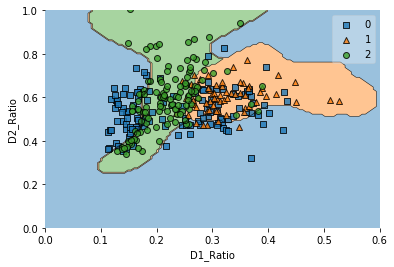

In [0]:
vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

# Exercises

Below are a few suggested exercises that may help improve your skills.

- Implement a support vector machine using the different algorithms available 
- Change the hyperparameters of the DecisionTreeClassifier to improve the accuracy

**TODO**
- add in some more exercises

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.